In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


climate_df = pd.read_parquet("data/climate_data_from_1982.parquet")

yield_df = pd.read_csv("data/barley_yield_from_1982.csv", sep=";")


In [2]:
climate_df.head(10)

scenario nom_dep code_dep                time  year  \
29950  historical     Ain       01 1982-01-01 12:00:00  1982   
29951  historical     Ain       01 1982-01-02 12:00:00  1982   
29952  historical     Ain       01 1982-01-03 12:00:00  1982   
29953  historical     Ain       01 1982-01-04 12:00:00  1982   
29954  historical     Ain       01 1982-01-05 12:00:00  1982   
29955  historical     Ain       01 1982-01-06 12:00:00  1982   
29956  historical     Ain       01 1982-01-07 12:00:00  1982   
29957  historical     Ain       01 1982-01-08 12:00:00  1982   
29958  historical     Ain       01 1982-01-09 12:00:00  1982   
29959  historical     Ain       01 1982-01-10 12:00:00  1982   

                             metric       value  
29950  near_surface_air_temperature  276.292267  
29951  near_surface_air_temperature  275.092407  
29952  near_surface_air_temperature  276.418518  
29953  near_surface_air_temperature  278.893372  
29954  near_surface_air_temperature  278.887207  
29955  near_surface_air_temperature  277.304535  
29956  near_surface_air_temperature  278.184235  
29957  near_surface_air_temperature  278.639221  
29958  near_surface_air_temperature  279.407043  
29959  near_surface_air_temperature  281.282776

In [3]:
climate_wide = climate_df.pivot_table(
    index=["scenario", "nom_dep", "code_dep", "time", "year"],
    columns="metric",
    values="value"
).reset_index()


In [4]:
climate_wide.head()

metric    scenario nom_dep code_dep                time  year  \
0       historical     Ain       01 1982-01-01 12:00:00  1982   
1       historical     Ain       01 1982-01-02 12:00:00  1982   
2       historical     Ain       01 1982-01-03 12:00:00  1982   
3       historical     Ain       01 1982-01-04 12:00:00  1982   
4       historical     Ain       01 1982-01-05 12:00:00  1982   

metric  daily_maximum_near_surface_air_temperature  \
0                                       279.337311   
1                                       277.687225   
2                                       278.388794   
3                                       283.519043   
4                                       281.122253   

metric  near_surface_air_temperature  precipitation  
0                         276.292267       0.000033  
1                         275.092407       0.000139  
2                         276.418518       0.000091  
3                         278.893372       0.000057  
4                         278.887207       0.000257

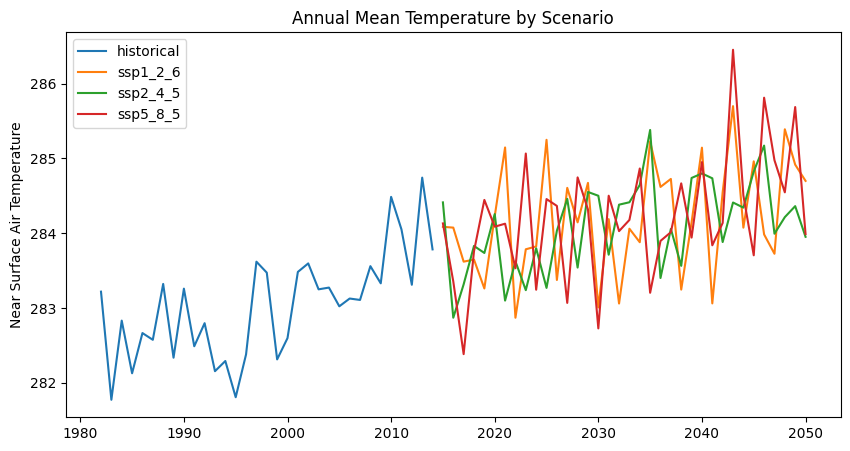

In [ ]:
annual = climate_wide.groupby(['scenario','year'])[
    ['near_surface_air_temperature','precipitation']
].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario']==scen]
    plt.plot(tmp['year'], tmp['near_surface_air_temperature'], label=scen)

plt.title("Annual Mean Temperature by Scenario")
plt.ylabel("Near Surface Air Temperature")
plt.legend()
plt.show()

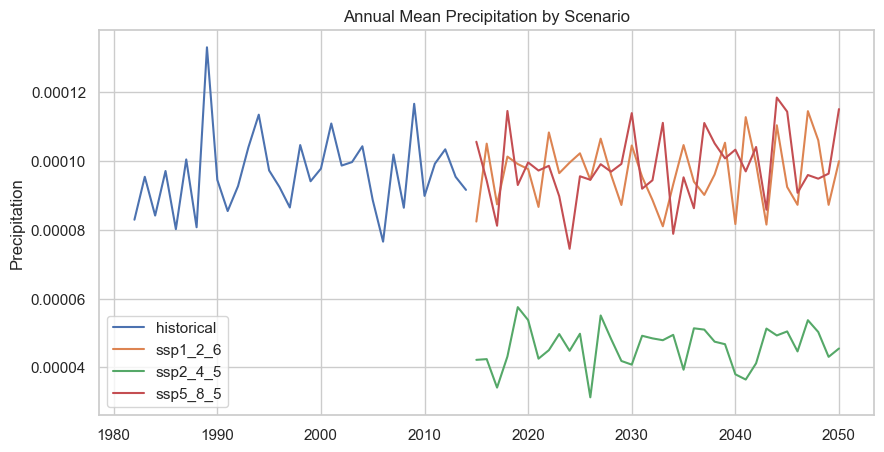

In [ ]:
annual = climate_wide.groupby(['scenario','year'])[
    ['near_surface_air_temperature','precipitation']
].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for scen in annual['scenario'].unique():
    tmp = annual[annual['scenario']==scen]
    plt.plot(tmp['year'], tmp['precipitation'], label=scen)

plt.title("Annual Mean Precipitation by Scenario")
plt.ylabel("Precipitation")
plt.legend()
plt.show()

In [7]:
yield_df.head()

Unnamed: 0 department  year    yield     area  production
0          82        Ain  1982  3.95008  16065.0     63458.0
1          83        Ain  1983      NaN  14500.0     38400.0
2          84        Ain  1984  4.82258  15500.0     74750.0
3          85        Ain  1985  4.19677  15500.0     65050.0
4          86        Ain  1986  3.59845  12900.0     46420.0

In [8]:
yield_df = yield_df.drop(columns=["Unnamed: 0"], errors="ignore")


In [9]:
yield_df.head()

department  year    yield     area  production
0        Ain  1982  3.95008  16065.0     63458.0
1        Ain  1983      NaN  14500.0     38400.0
2        Ain  1984  4.82258  15500.0     74750.0
3        Ain  1985  4.19677  15500.0     65050.0
4        Ain  1986  3.59845  12900.0     46420.0

In [10]:
yield_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   department  3583 non-null   str    
 1   year        3583 non-null   int64  
 2   yield       3336 non-null   float64
 3   area        3468 non-null   float64
 4   production  3461 non-null   float64
dtypes: float64(3), int64(1), str(1)
memory usage: 171.9 KB


# Prediction model (no lags, no scaling)


Top Features Selected:
                  feature  importance
150            department   40.757022
113     temp_std_s_Spring    1.955220
33         temp_max_m_m10    1.856398
20          temp_std_m_m9    1.753795
47         temp_min_m_m12    1.703579
14          temp_std_m_m3    1.686835
54    daily_max_temp_m_m7    1.568977
145             heat_days    1.427475
12          temp_std_m_m1    1.404628
71       precip_sum_m_m12    1.395592
22         temp_std_m_m11    1.377661
9         temp_mean_m_m10    1.306070
23         temp_std_m_m12    1.236857
4          temp_mean_m_m5    1.189878
19          temp_std_m_m8    1.187657
30          temp_max_m_m7    1.181344
25          temp_max_m_m2    1.117644
17          temp_std_m_m6    1.030852
117     temp_max_s_Spring    1.018971
37          temp_min_m_m2    0.920246
112     temp_std_s_Autumn    0.888359
56    daily_max_temp_m_m9    0.804522
18          temp_std_m_m7    0.785645
143   precip_min_s_Winter    0.780528
32          temp_max_m_m9 

/Users/magdalenaj1000/Documents/BCG_challange/BCG_challange/barley_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/magdalenaj1000/Documents/BCG_challange/BCG_challange/barley_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



=== CatBoost ===
Overall R²: 0.346, MAE: 0.823, RMSE: 1.030

Per-department stats:
                               R2       MAE      RMSE
Vienne                   0.783941  0.300100  0.381798
Yonne                    0.727555  0.293490  0.333091
Sarthe                   0.695398  0.412292  0.495550
Indre_et_Loire           0.683809  0.432830  0.511840
Vosges                   0.681357  0.359643  0.489018
Vendee                   0.677837  0.393552  0.510478
Loire_Atlantique         0.631434  0.526231  0.606520
Loire                    0.619862  0.510066  0.590488
Haute_Marne              0.617108  0.380797  0.477759
Nievre                   0.583741  0.462579  0.526162
Deux_Sevres              0.579433  0.405608  0.485290
Rhone                    0.572140  0.401241  0.543186
Saone_et_Loire           0.569273  0.517383  0.711659
Jura                     0.556287  0.447244  0.554991
Territoire_de_Belfort    0.523764  0.600796  0.683583
Haute_Loire              0.507000  0.512302  0.71599

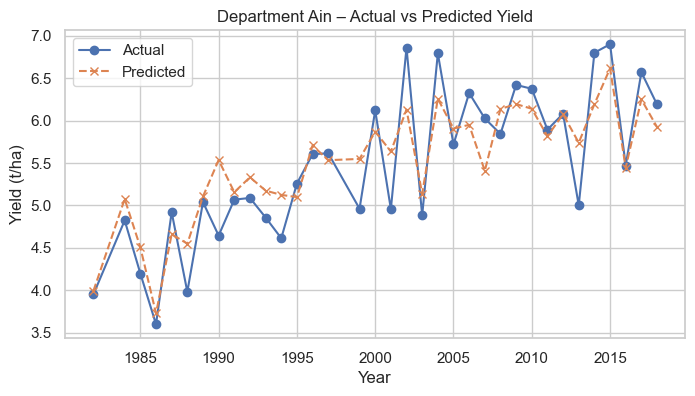

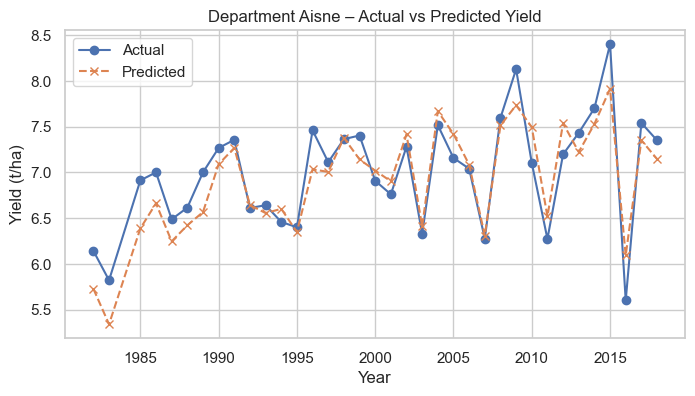

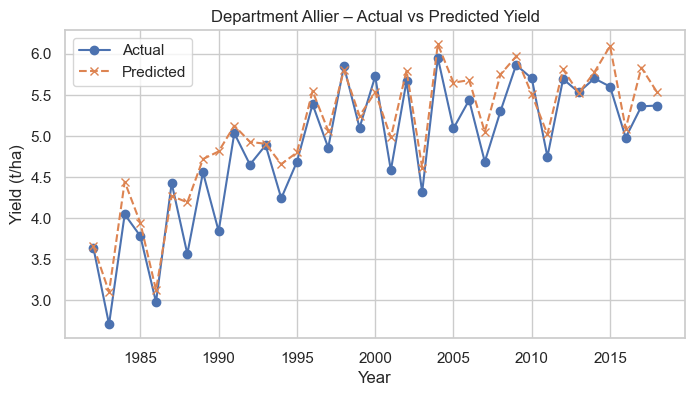

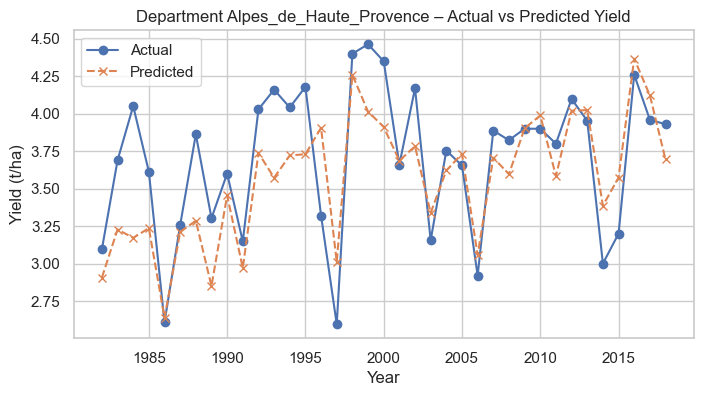

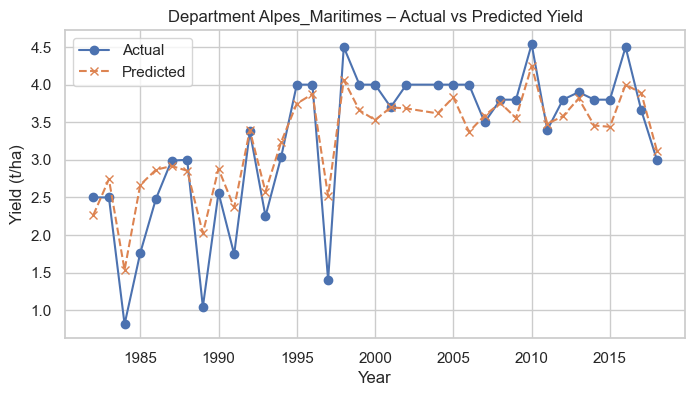

In [11]:
# ==============================
# Barley Yield Prediction Workflow (Full Working Version)
# ==============================

# ------------------------------
# 0️⃣ Imports
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb

sns.set(style="whitegrid")

# ------------------------------
# 1️⃣ Prepare Climate Features
# ------------------------------
climate_wide['time'] = pd.to_datetime(climate_wide['time'])
climate_wide['month'] = climate_wide['time'].dt.month
climate_wide['day'] = climate_wide['time'].dt.day
climate_wide['year'] = climate_wide['time'].dt.year

def month_to_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

climate_wide['season'] = climate_wide['month'].apply(month_to_season)

# ------------------------------
# 2️⃣ Monthly Aggregates
# ------------------------------
monthly = climate_wide.groupby(['nom_dep','year','month']).agg({
    'near_surface_air_temperature':['mean','std','max','min'],
    'daily_maximum_near_surface_air_temperature':'max',
    'precipitation':['sum','mean','max','min']
}).reset_index()

monthly.columns = ['department','year','month',
                   'temp_mean_m','temp_std_m','temp_max_m','temp_min_m',
                   'daily_max_temp_m','precip_sum_m','precip_mean_m','precip_max_m','precip_min_m']

monthly_wide = monthly.pivot(index=['department','year'], columns='month')
monthly_wide.columns = ['{}_m{}'.format(c[0], c[1]) for c in monthly_wide.columns]
monthly_wide = monthly_wide.reset_index()

# Multiply monthly precipitation features by 1000
for col in monthly_wide.columns:
    if 'precip' in col:
        monthly_wide[col] = monthly_wide[col] * 1000

# ------------------------------
# 3️⃣ Seasonal Aggregates
# ------------------------------
seasonal = climate_wide.groupby(['nom_dep','year','season']).agg({
    'near_surface_air_temperature':['mean','std','max','min'],
    'daily_maximum_near_surface_air_temperature':'max',
    'precipitation':['sum','mean','max','min']
}).reset_index()

seasonal.columns = ['department','year','season',
                    'temp_mean_s','temp_std_s','temp_max_s','temp_min_s',
                    'daily_max_temp_s','precip_sum_s','precip_mean_s','precip_max_s','precip_min_s']

seasonal_wide = seasonal.pivot(index=['department','year'], columns='season')
seasonal_wide.columns = ['{}_{}'.format(c[0], c[1]) for c in seasonal_wide.columns]
seasonal_wide = seasonal_wide.reset_index()

# Multiply seasonal precipitation features by 1000
for col in seasonal_wide.columns:
    if 'precip' in col:
        seasonal_wide[col] = seasonal_wide[col] * 1000

# ------------------------------
# 4️⃣ Merge Climate Features with Yield
# ------------------------------
model_df = yield_df.merge(monthly_wide, on=['department','year'], how='left')
model_df = model_df.merge(seasonal_wide, on=['department','year'], how='left')

# ------------------------------
# 5️⃣ Representative Month for Cyclical Features
# ------------------------------
rep_month = climate_wide.groupby(['nom_dep','year'])['month'].mean().reset_index()
rep_month.rename(columns={'nom_dep':'department','month':'month_rep'}, inplace=True)
model_df = model_df.merge(rep_month, on=['department','year'], how='left')

# ------------------------------
# 6️⃣ Additional Climate Features
# ------------------------------
gdd_total = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].apply(lambda x: np.maximum(x-5, 0).sum()).reset_index(name='gdd_total')
heat_days = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].apply(lambda x: (x>30).sum()).reset_index(name='heat_days')
dry_days = climate_wide.groupby(['nom_dep','year'])['precipitation'].apply(lambda x: (x<1).sum()).reset_index(name='dry_days')

spring = climate_wide[climate_wide['month'].isin([3,4,5])]
spring_temp = spring.groupby(['nom_dep','year'])['near_surface_air_temperature'].mean().reset_index(name='spring_temp')
spring_precip = spring.groupby(['nom_dep','year'])['precipitation'].sum().reset_index(name='spring_precip')

temp_variability = climate_wide.groupby(['nom_dep','year'])['near_surface_air_temperature'].std().reset_index(name='temp_variability')

# Merge these features into model_df
for df in [gdd_total, heat_days, dry_days, spring_temp, spring_precip, temp_variability]:
    model_df = model_df.merge(df, left_on=['department','year'], right_on=['nom_dep','year'], how='left')
    model_df.drop(columns=['nom_dep'], inplace=True)


# ------------------------------
# 7️⃣ Optional Interaction Features
# ------------------------------
if 'temp_mean_m1' in model_df.columns and 'precip_sum_m1' in model_df.columns:
    model_df['temp_precip_ratio'] = model_df['temp_mean_m1'] / (model_df['precip_sum_m1']+0.01)

# Drop NaNs from lags
model_df = model_df.dropna().reset_index(drop=True)

# ------------------------------
# 8️⃣ Features & Target
# ------------------------------
feature_cols = [col for col in model_df.columns if ('_m' in col or '_s' in col)]  # monthly & seasonal features

# Add your additional climate features
feature_cols += [
    'gdd_total',
    'heat_days',
    'dry_days',
    'spring_temp',
    'spring_precip',
    'temp_variability'
]

if 'temp_precip_ratio' in model_df.columns:
    feature_cols.append('temp_precip_ratio')

X = model_df[feature_cols + ['department']].copy()
y = model_df['yield']

# Ensure department is categorical
X['department'] = X['department'].astype('category')

# ------------------------------
# 9️⃣ Feature Selection via CatBoost
# ------------------------------
cat_selector = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0)
cat_selector.fit(X, y, cat_features=['department'])
importances = cat_selector.get_feature_importance()
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False)
top_features = importance_df['feature'].head(40).tolist()
print("\nTop Features Selected:")
print(importance_df.head(40))

# Always keep 'department'
if 'department' not in top_features:
    top_features.append('department')

X_top = X[top_features].copy()

# ------------------------------
# 🔟 TimeSeriesSplit CV & Models
# ------------------------------
tscv = TimeSeriesSplit(n_splits=3)
models = {
    'CatBoost': CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0),
    'XGBoost': xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
}

results = {}
for name, model in models.items():
    r2_list, mae_list, rmse_list = [], [], []
    dept_stats = {}
    
    for train_idx, test_idx in tscv.split(X_top):
        X_train, X_test = X_top.iloc[train_idx].copy(), X_top.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        if name == 'CatBoost':
            model.fit(X_train, y_train, cat_features=['department'], verbose=0)
        else:
            for df in [X_train, X_test]:
                df['department'] = df['department'].cat.codes
            model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2_list.append(r2_score(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        
        # Department-level stats
        test_copy = X_test.copy()
        test_copy['y_true'] = y_test
        test_copy['y_pred'] = y_pred
        for dept, group in test_copy.groupby('department'):
            r2_d = r2_score(group['y_true'], group['y_pred'])
            mae_d = mean_absolute_error(group['y_true'], group['y_pred'])
            rmse_d = np.sqrt(mean_squared_error(group['y_true'], group['y_pred']))
            if dept not in dept_stats:
                dept_stats[dept] = {'R2':[], 'MAE':[], 'RMSE':[]}
            dept_stats[dept]['R2'].append(r2_d)
            dept_stats[dept]['MAE'].append(mae_d)
            dept_stats[dept]['RMSE'].append(rmse_d)
    
    results[name] = {
        'R2': np.mean(r2_list),
        'MAE': np.mean(mae_list),
        'RMSE': np.mean(rmse_list),
        'department_stats': {k:{metric: np.mean(vals) for metric,vals in v.items()} for k,v in dept_stats.items()}
    }

# ------------------------------
# 1️⃣1️⃣ Display Stats
# ------------------------------
for model_name, stats in results.items():
    print(f"\n=== {model_name} ===")
    print(f"Overall R²: {stats['R2']:.3f}, MAE: {stats['MAE']:.3f}, RMSE: {stats['RMSE']:.3f}")
    dept_df = pd.DataFrame(stats['department_stats']).T.sort_values('R2', ascending=False)
    print("\nPer-department stats:")
    print(dept_df)

# ------------------------------
# 1️⃣2️⃣ Fit Best Model on Full Data
# ------------------------------
best_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"\nBest model selected: {best_model_name}")

if best_model_name == 'CatBoost':
    final_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, verbose=0)
    final_model.fit(X_top, y, cat_features=['department'], verbose=0)
    X_final = X_top
else:
    X_final = X_top.copy()
    X_final['department'] = X_final['department'].cat.codes
    final_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
    final_model.fit(X_final, y)

model_df['yield_pred'] = final_model.predict(X_final)

# ------------------------------
# 1️⃣3️⃣ Plot Actual vs Predicted
# ------------------------------
for dept in model_df['department'].unique()[:5]:  # plot for first 5 departments
    dept_data = model_df[model_df['department']==dept]
    plt.figure(figsize=(8,4))
    plt.plot(dept_data['year'], dept_data['yield'], marker='o', label='Actual')
    plt.plot(dept_data['year'], dept_data['yield_pred'], marker='x', linestyle='--', label='Predicted')
    plt.title(f"Department {dept} – Actual vs Predicted Yield")
    plt.xlabel("Year")
    plt.ylabel("Yield (t/ha)")
    plt.legend()
    plt.show()


# Shap

Explaining model: CatBoost


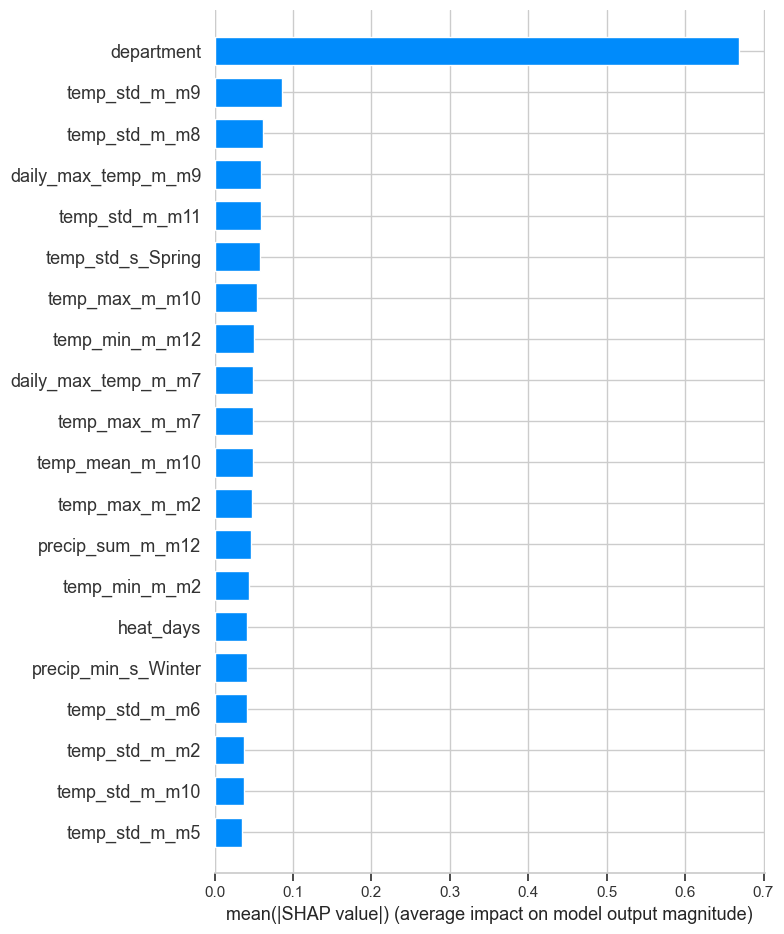

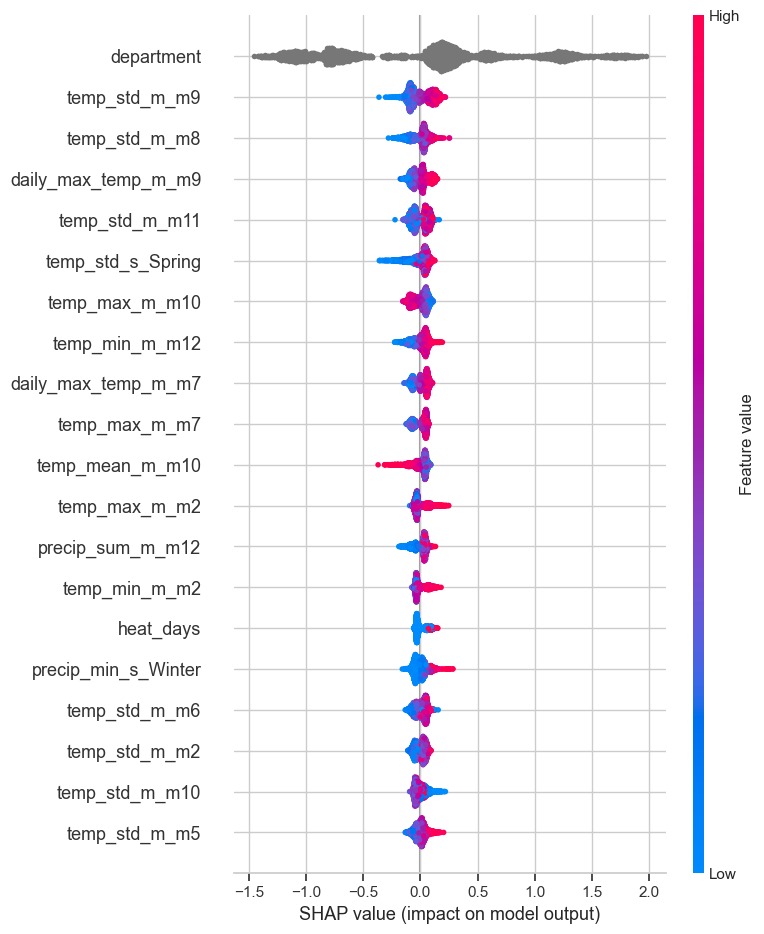

In [12]:
import shap

print(f"Explaining model: {best_model_name}")

# Use same feature matrix used for final training
X_explain = X_top.copy()

if best_model_name == 'XGBoost':
    X_explain['department'] = X_explain['department'].cat.codes
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_explain)

elif best_model_name == 'CatBoost':
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_explain)

# Plot SHAP summary
shap.summary_plot(shap_values, X_explain, plot_type="bar")
shap.summary_plot(shap_values, X_explain)


# Correlation Matrix for selected features

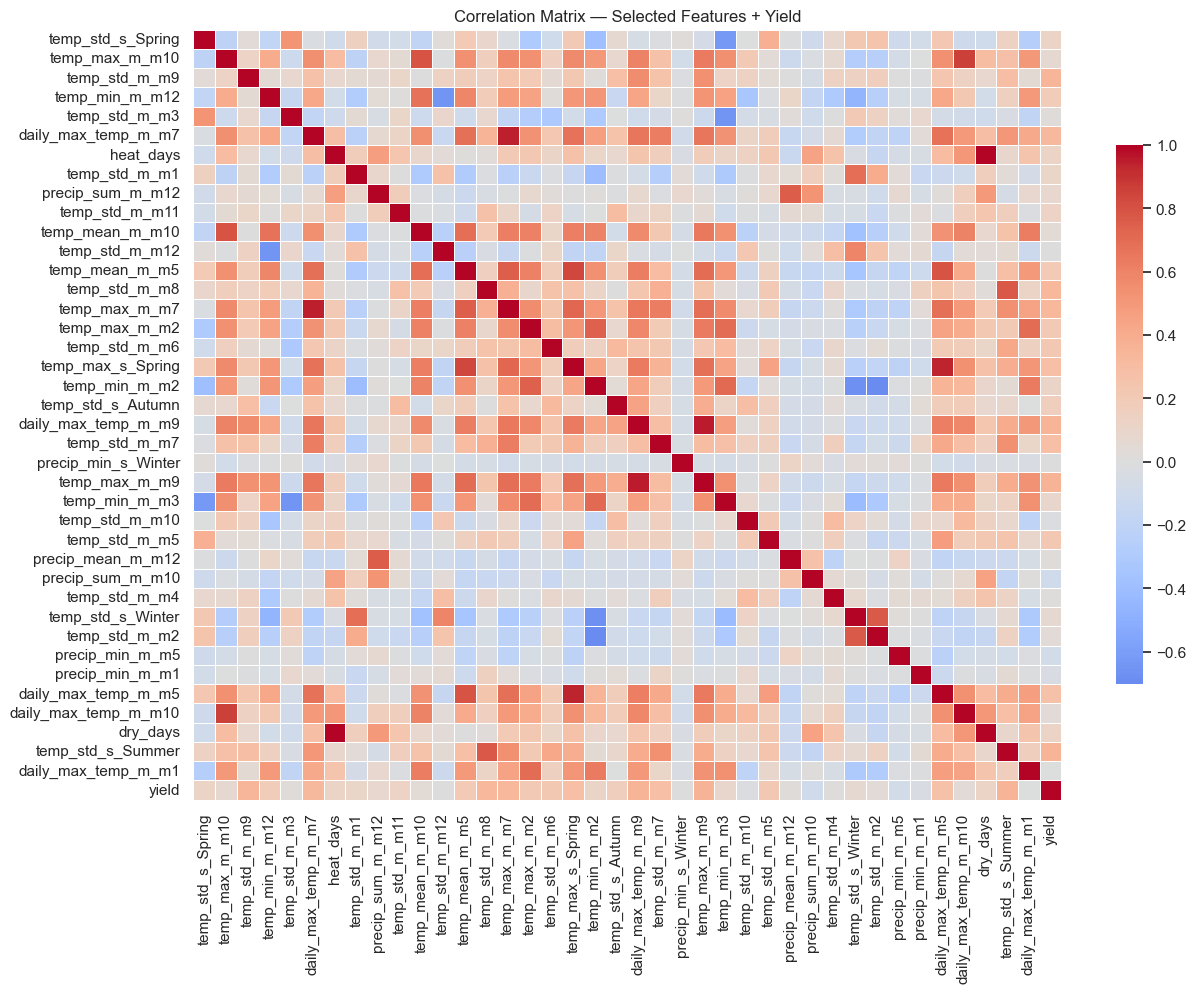

In [13]:
# ------------------------------
# Correlation Matrix (Features + Yield)
# ------------------------------

corr_df = X_top.drop(columns=['department'], errors='ignore').copy()
corr_df['yield'] = model_df['yield']

corr_matrix = corr_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Matrix — Selected Features + Yield")
plt.show()




# Future Scenario Predictions

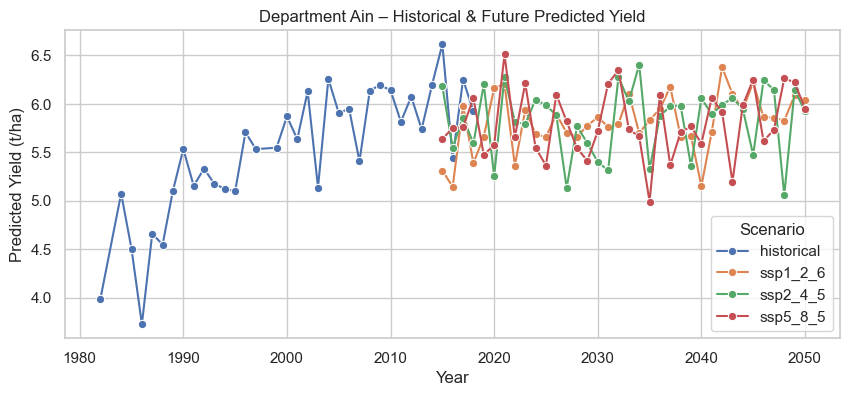

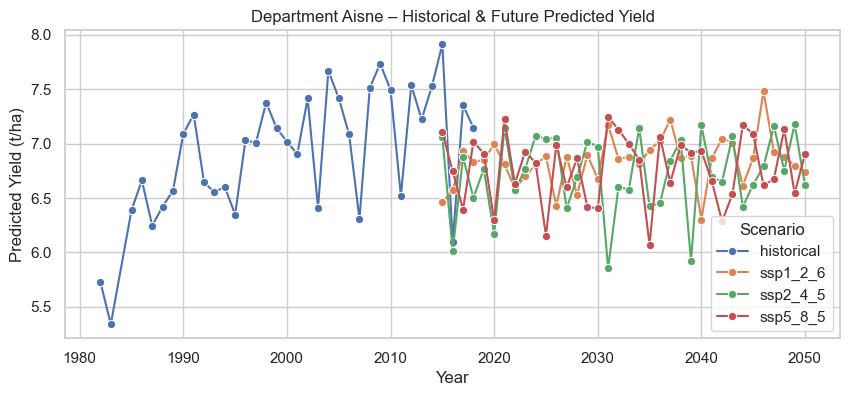

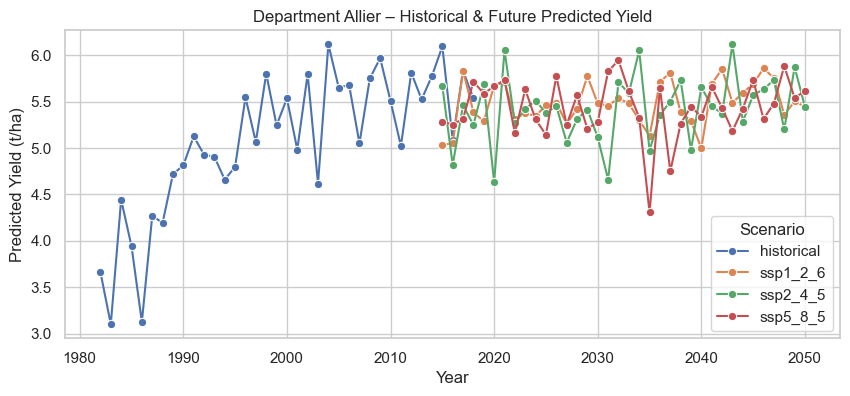

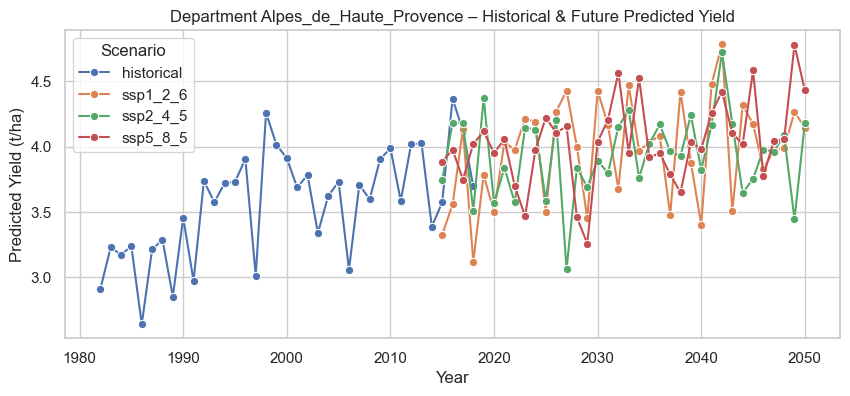

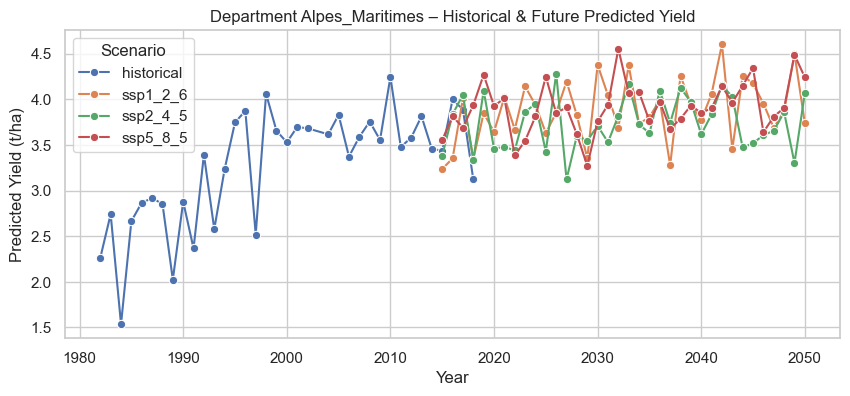

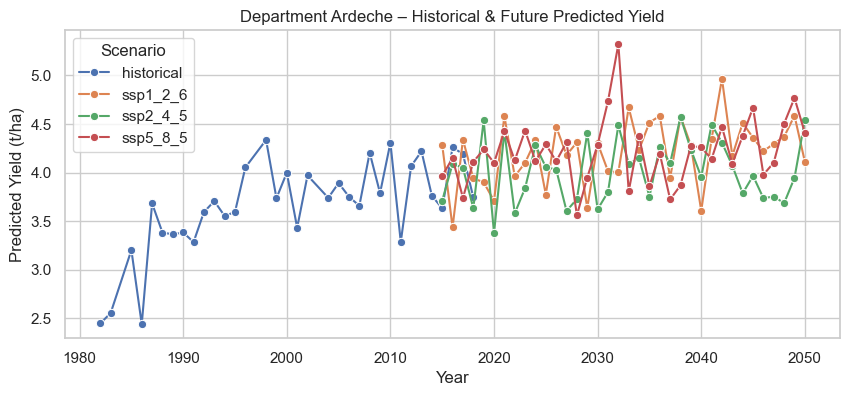

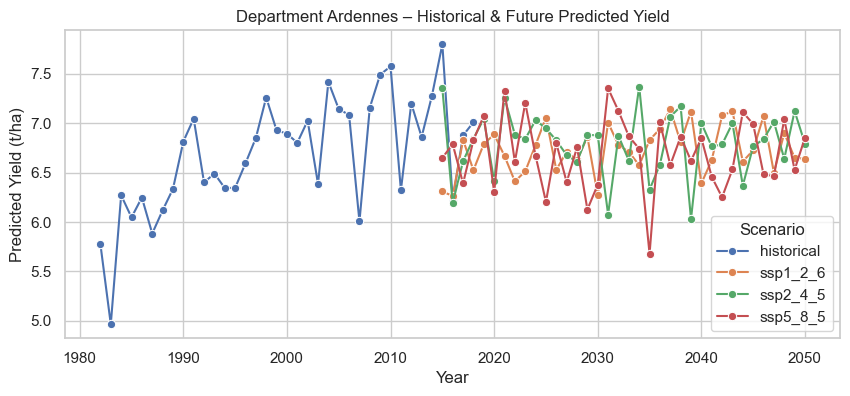

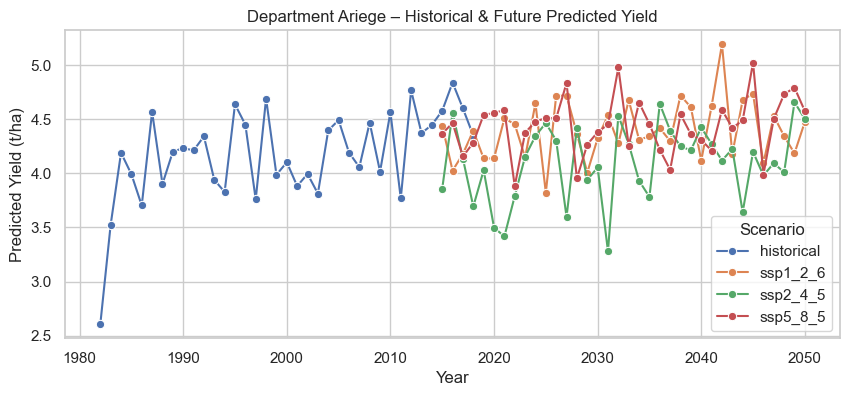

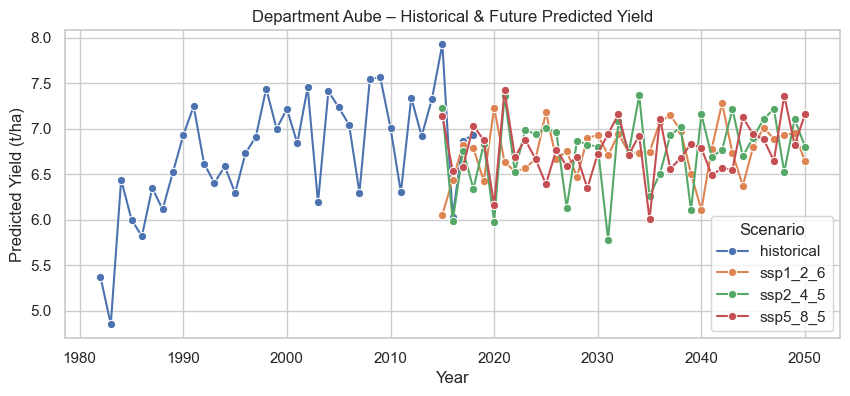

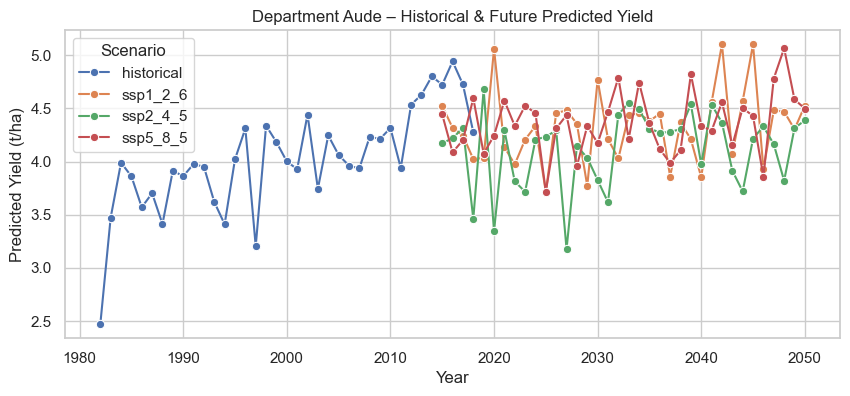

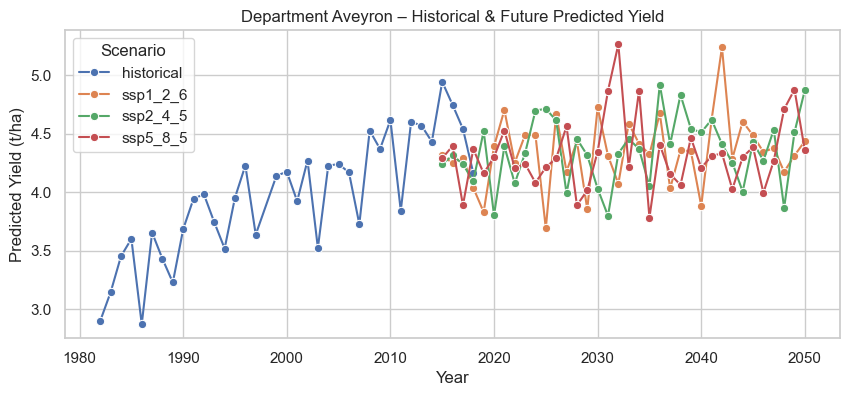

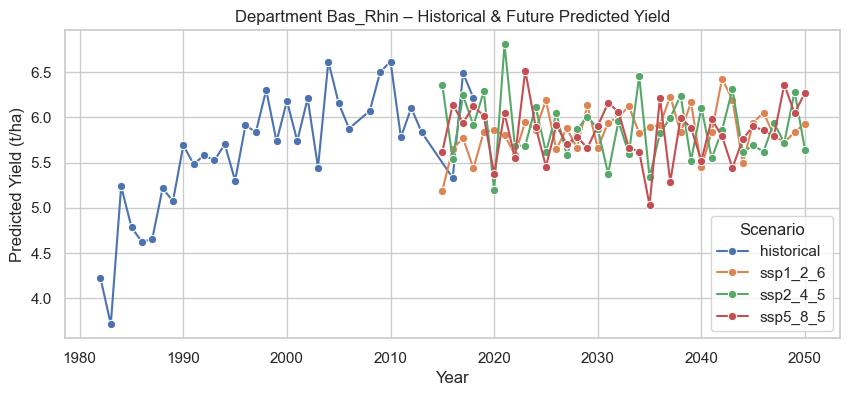

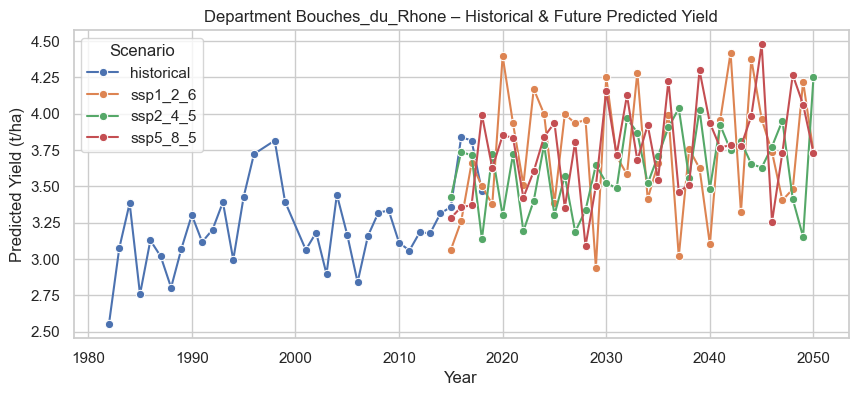

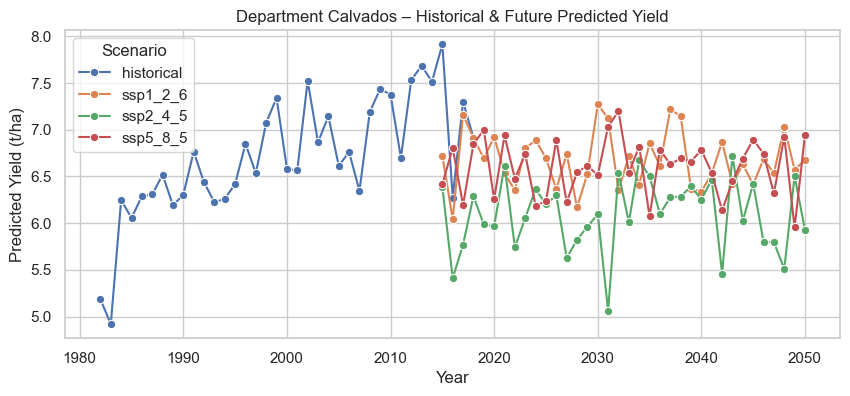

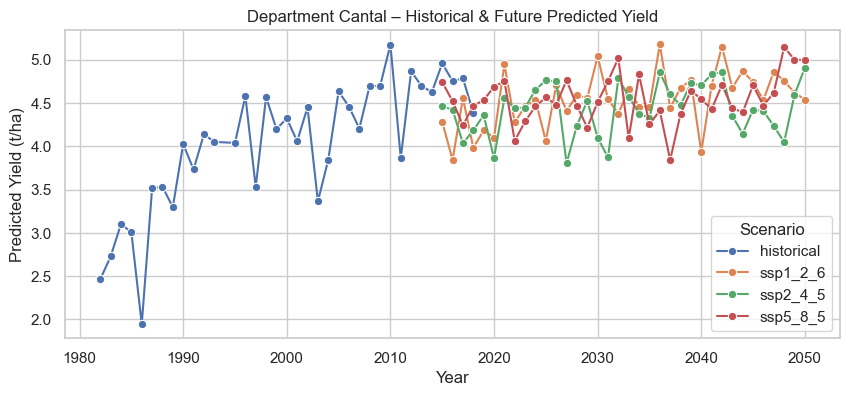

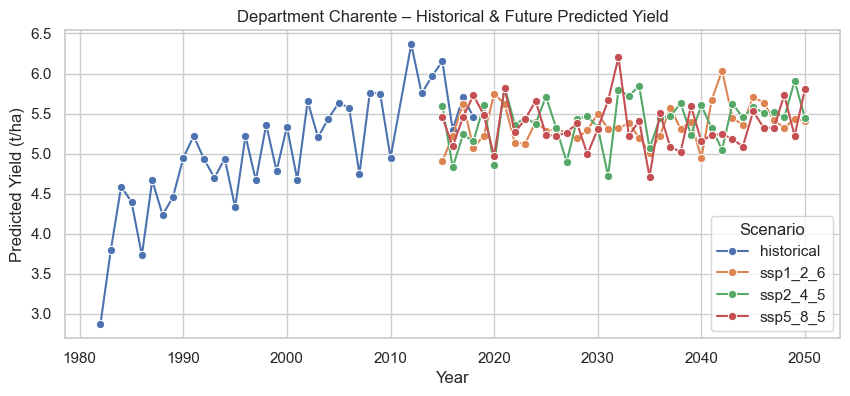

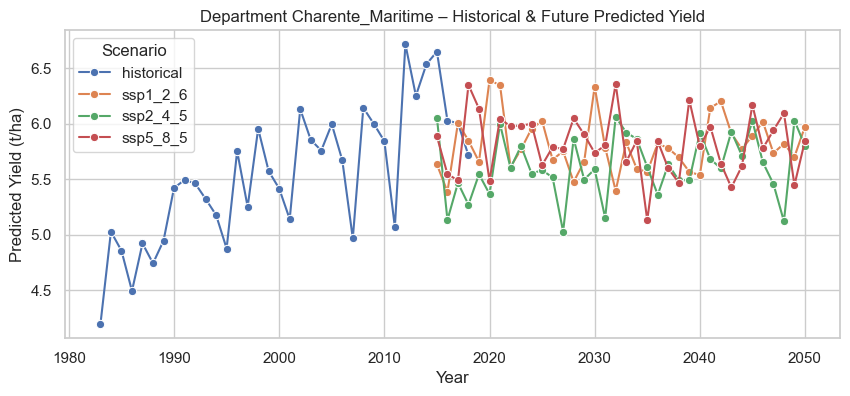

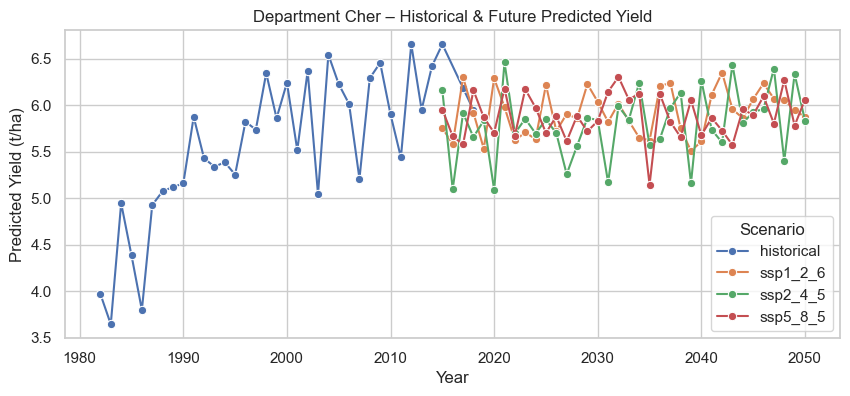

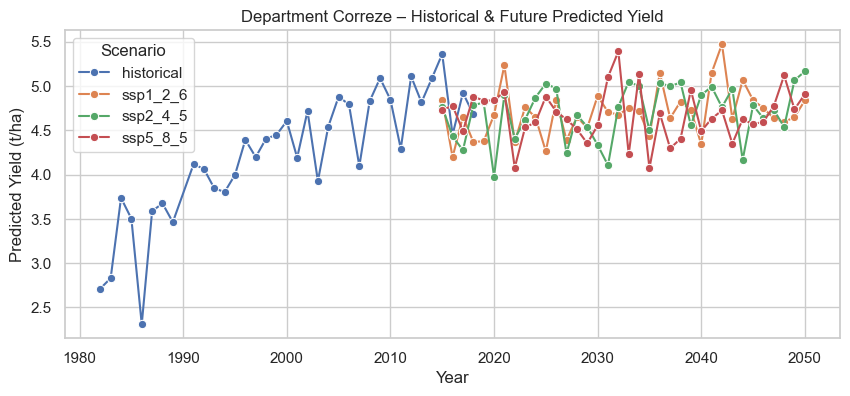

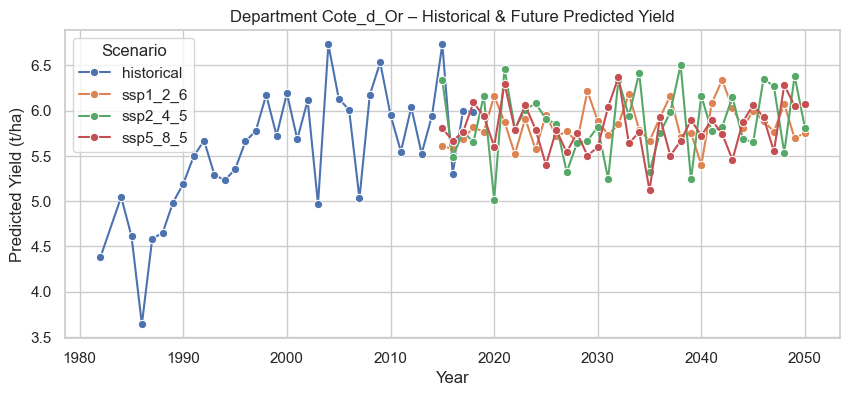

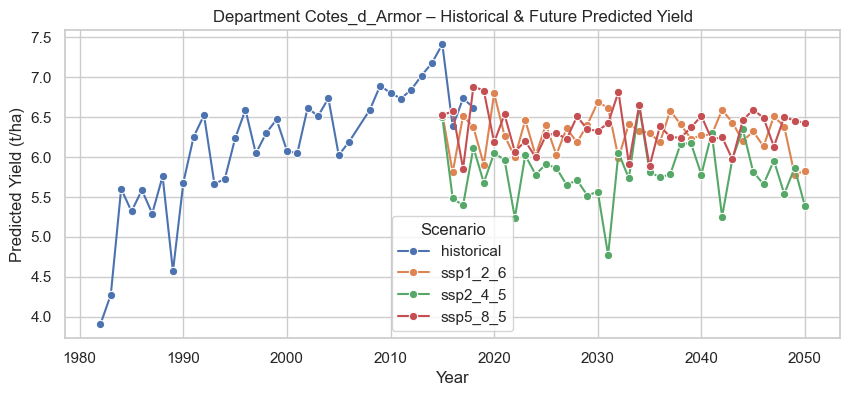

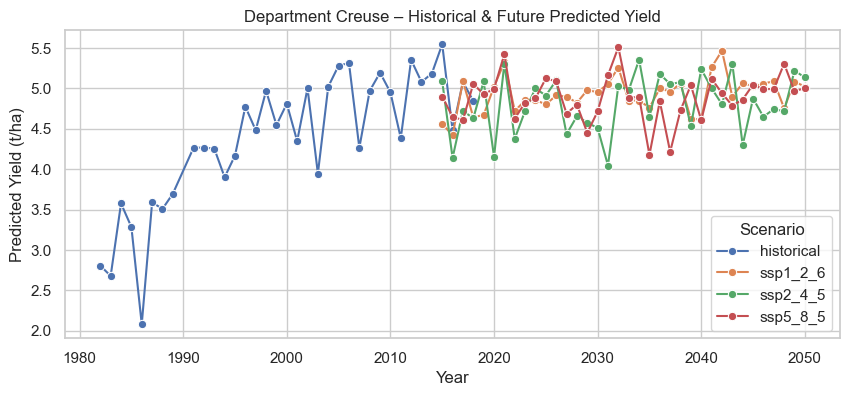

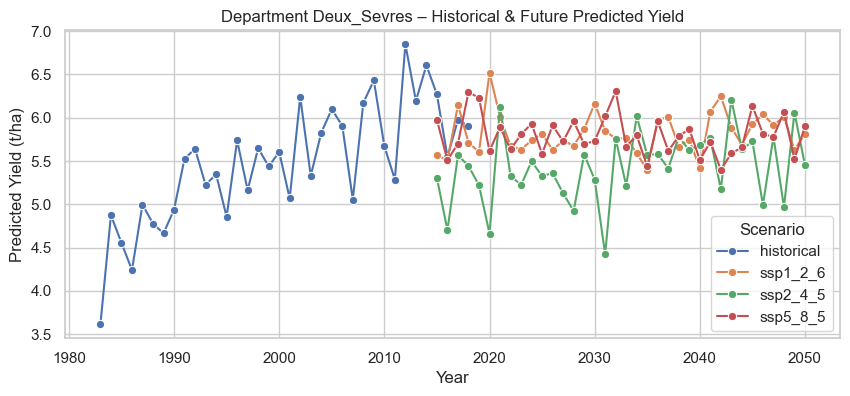

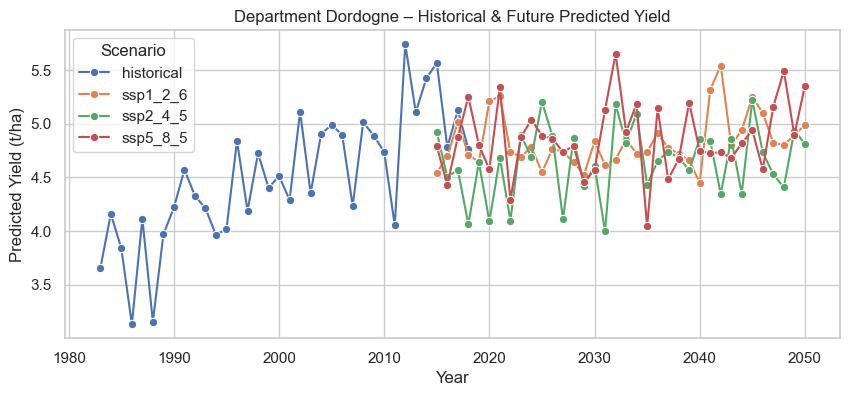

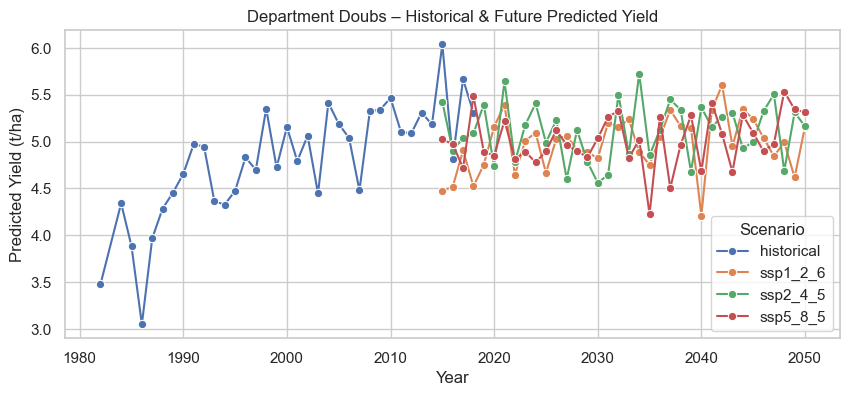

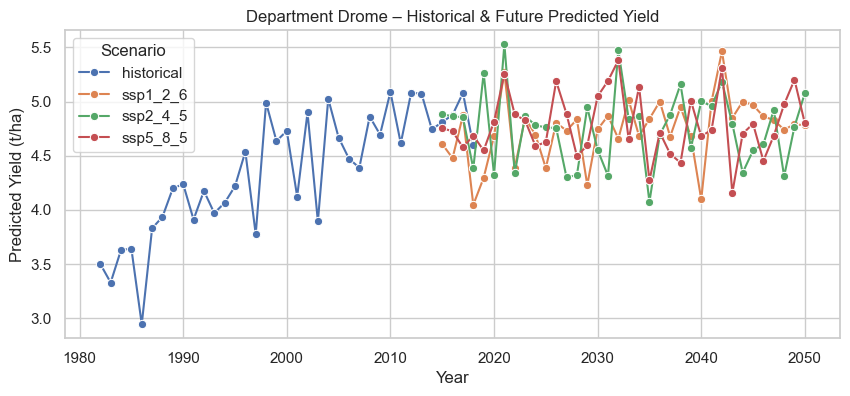

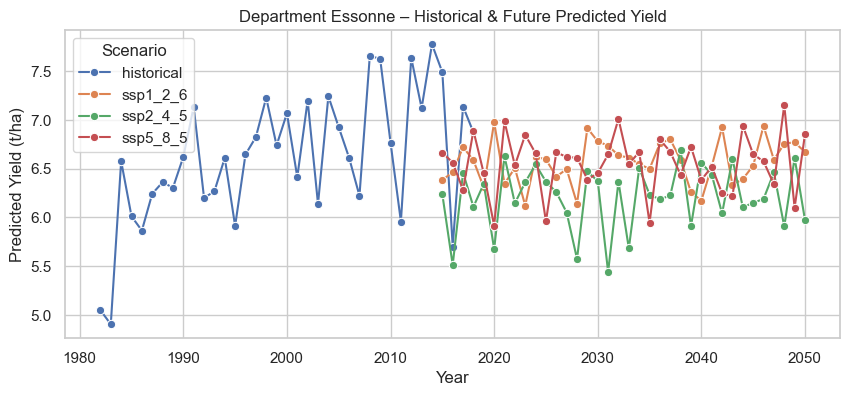

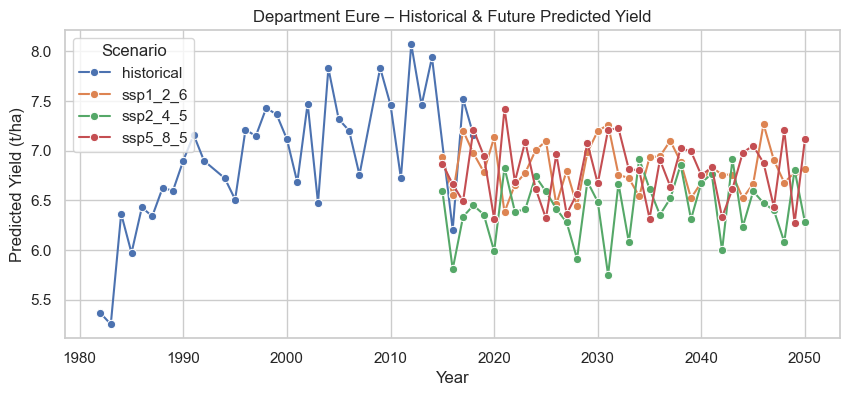

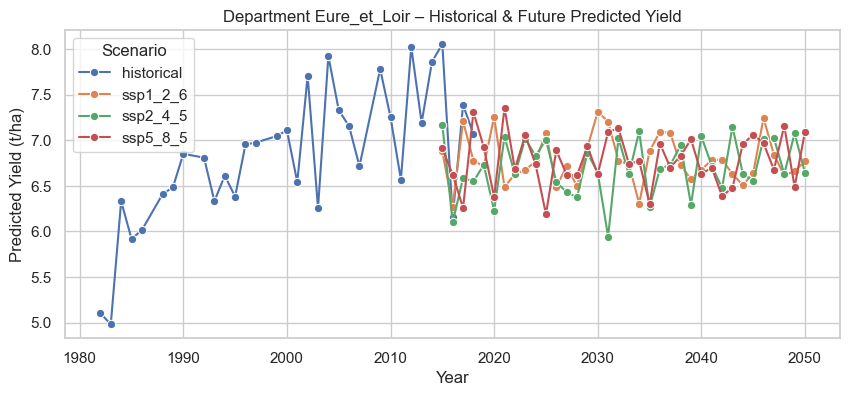

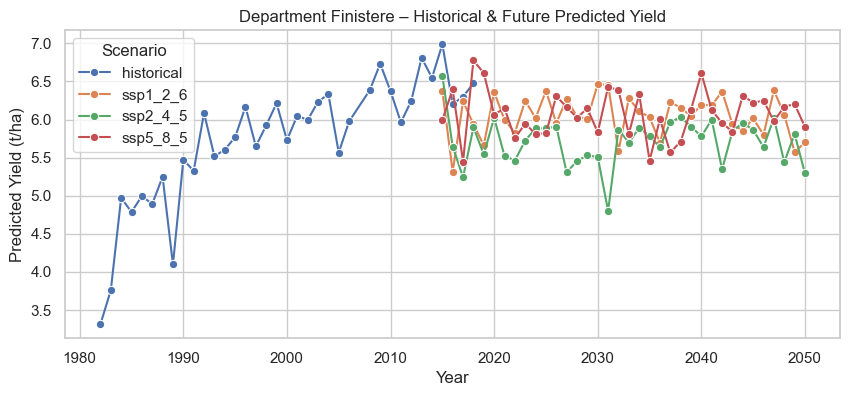

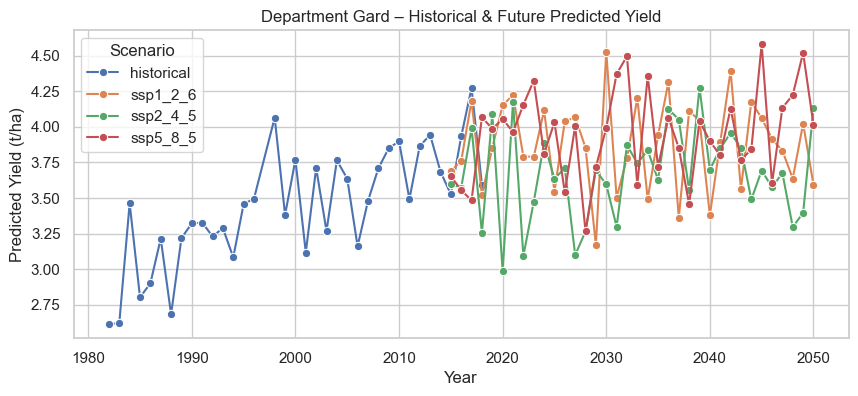

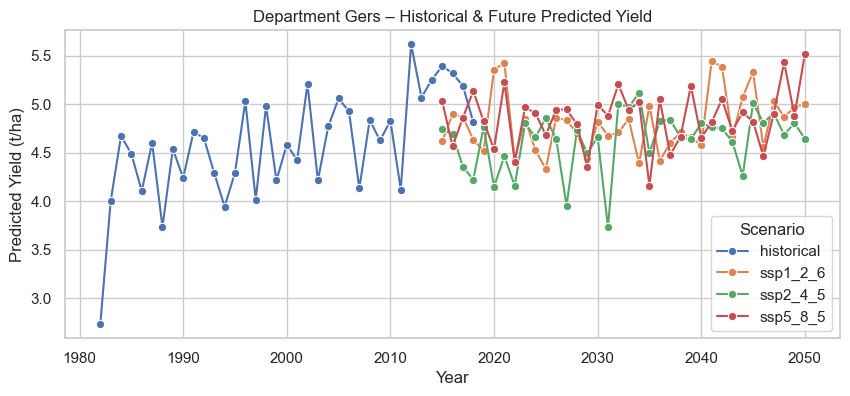

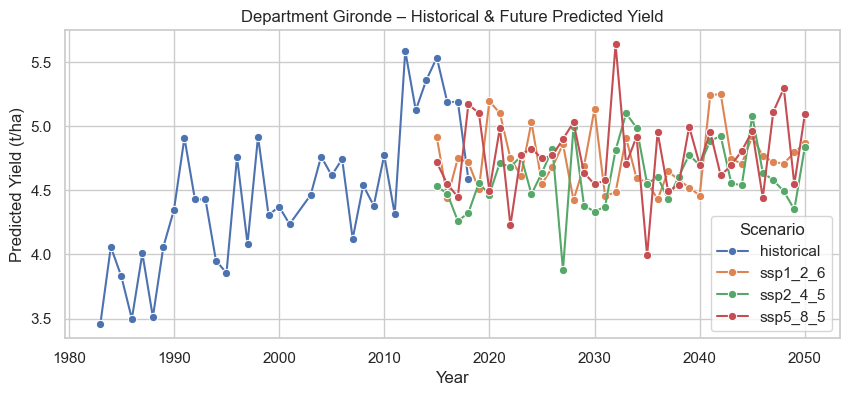

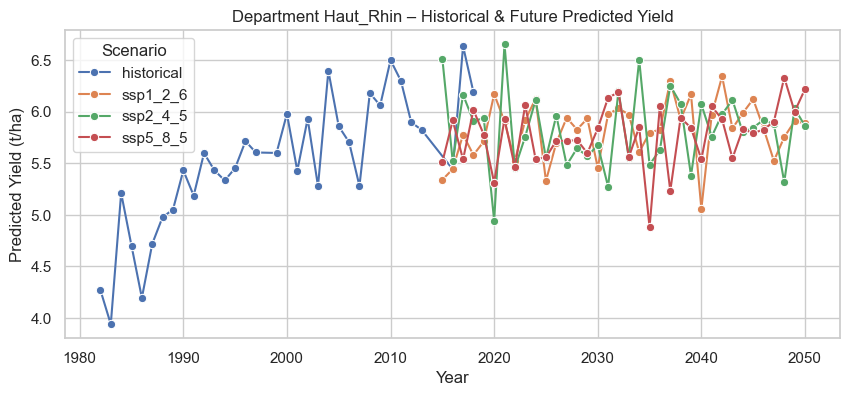

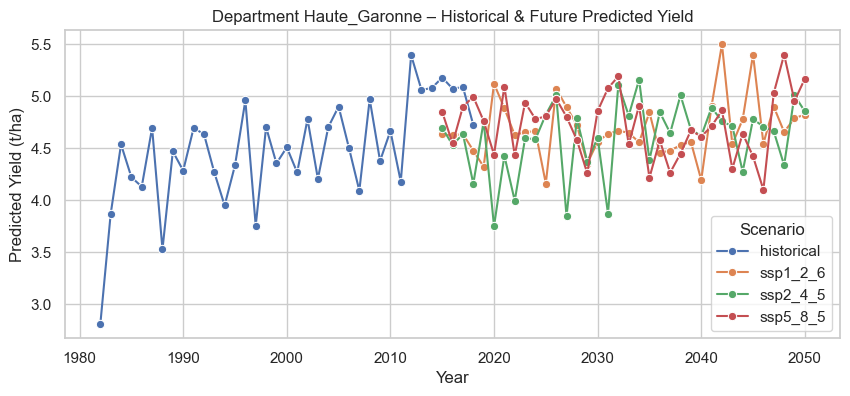

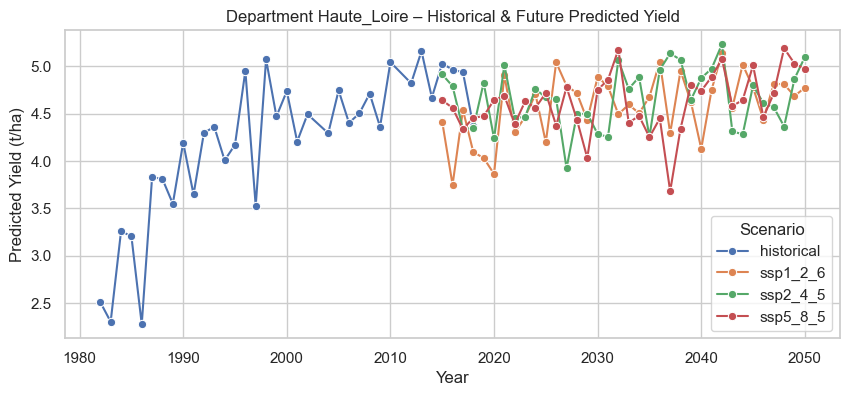

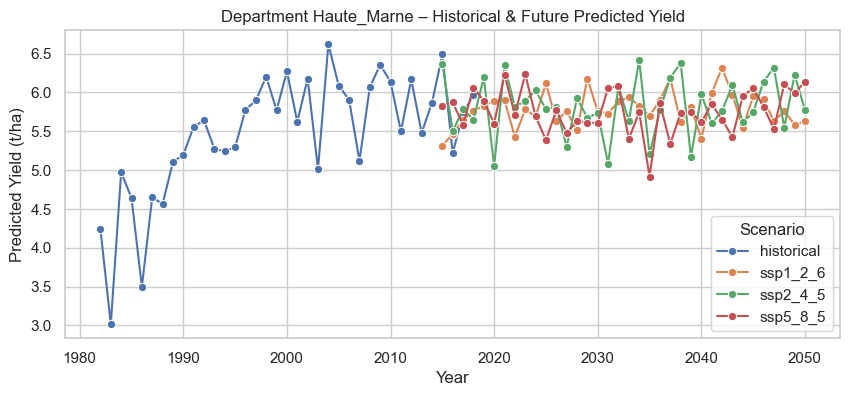

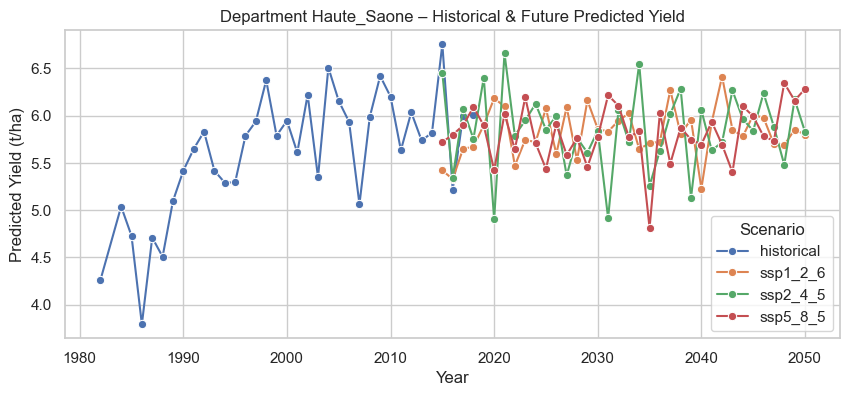

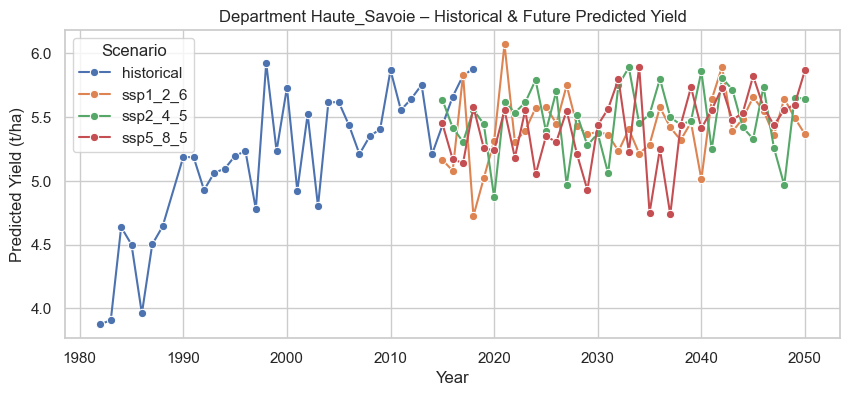

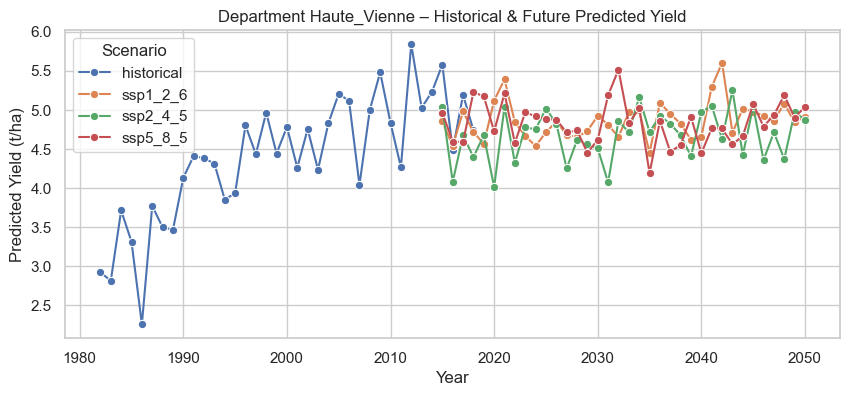

In [14]:
# ------------------------------
# Prepare Future Scenario Predictions
# ------------------------------

future_scenarios = ['ssp1_2_6','ssp2_4_5','ssp5_8_5']

# Store predictions
future_preds = []

for scenario in future_scenarios:
    # Subset climate data for this scenario
    climate_future = climate_wide[climate_wide['scenario'] == scenario].copy()
    
    # ------------------------------
    # Create Monthly & Seasonal Aggregates
    # ------------------------------
    climate_future['month'] = climate_future['time'].dt.month
    climate_future['day'] = climate_future['time'].dt.day
    climate_future['year'] = climate_future['time'].dt.year

    # Monthly
    monthly = climate_future.groupby(['nom_dep','year','month']).agg({
        'near_surface_air_temperature':['mean','std','max','min'],
        'daily_maximum_near_surface_air_temperature':'max',
        'precipitation':['sum','mean','max','min']
    }).reset_index()
    
    monthly.columns = ['department','year','month',
                       'temp_mean_m','temp_std_m','temp_max_m','temp_min_m',
                       'daily_max_temp_m','precip_sum_m','precip_mean_m','precip_max_m','precip_min_m']
    
    monthly_wide = monthly.pivot(index=['department','year'], columns='month')
    monthly_wide.columns = ['{}_m{}'.format(c[0], c[1]) for c in monthly_wide.columns]
    monthly_wide = monthly_wide.reset_index()
    
    # Multiply precipitation
    for col in monthly_wide.columns:
        if 'precip' in col:
            monthly_wide[col] = monthly_wide[col]*1000

    # Seasonal
    def month_to_season(month):
        if month in [12,1,2]: return 'Winter'
        elif month in [3,4,5]: return 'Spring'
        elif month in [6,7,8]: return 'Summer'
        else: return 'Autumn'
    
    climate_future['season'] = climate_future['month'].apply(month_to_season)
    
    seasonal = climate_future.groupby(['nom_dep','year','season']).agg({
        'near_surface_air_temperature':['mean','std','max','min'],
        'daily_maximum_near_surface_air_temperature':'max',
        'precipitation':['sum','mean','max','min']
    }).reset_index()
    
    seasonal.columns = ['department','year','season',
                        'temp_mean_s','temp_std_s','temp_max_s','temp_min_s',
                        'daily_max_temp_s','precip_sum_s','precip_mean_s','precip_max_s','precip_min_s']
    
    seasonal_wide = seasonal.pivot(index=['department','year'], columns='season')
    seasonal_wide.columns = ['{}_{}'.format(c[0], c[1]) for c in seasonal_wide.columns]
    seasonal_wide = seasonal_wide.reset_index()
    
    for col in seasonal_wide.columns:
        if 'precip' in col:
            seasonal_wide[col] = seasonal_wide[col]*1000

    # ------------------------------
    # Additional Climate Features
    # ------------------------------
    gdd_total = climate_future.groupby('nom_dep')['near_surface_air_temperature'].apply(lambda x: np.maximum(x-5,0).sum()).reset_index(name='gdd_total')
    heat_days = climate_future.groupby('nom_dep')['near_surface_air_temperature'].apply(lambda x: (x>30).sum()).reset_index(name='heat_days')
    dry_days = climate_future.groupby('nom_dep')['precipitation'].apply(lambda x: (x<1).sum()).reset_index(name='dry_days')

    spring = climate_future[climate_future['month'].isin([3,4,5])]
    spring_temp = spring.groupby('nom_dep')['near_surface_air_temperature'].mean().reset_index(name='spring_temp')
    spring_precip = spring.groupby('nom_dep')['precipitation'].sum().reset_index(name='spring_precip')
    temp_variability = climate_future.groupby('nom_dep')['near_surface_air_temperature'].std().reset_index(name='temp_variability')

    # ------------------------------
    # Merge Features
    # ------------------------------
    future_df = monthly_wide.merge(seasonal_wide, on=['department','year'], how='left')
    for df in [gdd_total, heat_days, dry_days, spring_temp, spring_precip, temp_variability]:
        future_df = future_df.merge(df, left_on='department', right_on='nom_dep', how='left')
        future_df.drop(columns=['nom_dep'], inplace=True)
    
    # Representative month
    rep_month = climate_future.groupby('nom_dep')['month'].mean().reset_index()
    rep_month.rename(columns={'nom_dep':'department','month':'month_rep'}, inplace=True)
    future_df = future_df.merge(rep_month, on='department', how='left')
    
    # Optional interaction
    if 'temp_mean_m1' in future_df.columns and 'precip_sum_m1' in future_df.columns:
        future_df['temp_precip_ratio'] = future_df['temp_mean_m1'] / (future_df['precip_sum_m1']+0.01)
    
    # Ensure department is categorical
    future_df['department'] = future_df['department'].astype('category')
    
    # Select top features
    X_future = future_df[X_top.columns].copy()
    
    # Predict
    if best_model_name == 'CatBoost':
        future_df['yield_pred'] = final_model.predict(X_future)
    else:
        X_future['department'] = X_future['department'].cat.codes
        future_df['yield_pred'] = final_model.predict(X_future)
    
    future_df['scenario'] = scenario
    future_preds.append(future_df[['department','year','yield_pred','scenario']])

# ------------------------------
# Combine Historical & Future Predictions
# ------------------------------
hist_preds = model_df[['department','year','yield_pred']].copy()
hist_preds['scenario'] = 'historical'

all_preds = pd.concat([hist_preds]+future_preds)

# ------------------------------
# Plot Predictions by Scenario
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

departments = all_preds['department'].unique()[:40]  # first 5 departments

for dept in departments:
    dept_data = all_preds[all_preds['department']==dept]
    plt.figure(figsize=(10,4))
    sns.lineplot(data=dept_data, x='year', y='yield_pred', hue='scenario', marker='o')
    plt.title(f"Department {dept} – Historical & Future Predicted Yield")
    plt.ylabel("Predicted Yield (t/ha)")
    plt.xlabel("Year")
    plt.legend(title='Scenario')
    plt.show()


# Actionable Recommendation

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select latest year to get department-level climate risk
latest_year = model_df['year'].max()
dept_climate = model_df[model_df['year']==latest_year][
    ['department', 'dry_days', 'heat_days', 'temp_variability']
].copy()

# Normalize metrics
scaler = MinMaxScaler()
dept_climate[['dry_norm','heat_norm','tempvar_norm']] = scaler.fit_transform(
    dept_climate[['dry_days','heat_days','temp_variability']]
)

# Invert so that lower risk = higher score
dept_climate['dry_score'] = 1 - dept_climate['dry_norm']
dept_climate['heat_score'] = 1 - dept_climate['heat_norm']
dept_climate['tempvar_score'] = 1 - dept_climate['tempvar_norm']

# Combine into ESG score (weighted)
dept_climate['esg_score'] = (0.4*dept_climate['dry_score'] + 
                             0.4*dept_climate['heat_score'] + 
                             0.2*dept_climate['tempvar_score'])

# Keep only department and esg_score
esg_scores = dept_climate[['department','esg_score']].copy()
esg_scores = esg_scores.sort_values('esg_score', ascending=False)

print(esg_scores)


                   department  esg_score
504                  Calvados   0.937711
1008                     Eure   0.900395
828               Deux_Sevres   0.893917
2880          Tarn_et_Garonne   0.854282
974                   Essonne   0.850426
2984                 Vaucluse   0.837277
2915    Territoire_de_Belfort   0.836799
2607                    Rhone   0.833862
1077                Finistere   0.600000
756             Cotes_d_Armor   0.574365
2264                 Morbihan   0.561971
2083                   Manche   0.549967
2535     Pyrenees_Atlantiques   0.528286
1761                   Landes   0.525789
2781           Seine_Maritime   0.524222
1580          Ille_et_Vilaine   0.523752
2436                     Orne   0.520531
1867         Loire_Atlantique   0.519677
3021                   Vendee   0.516044
612         Charente_Maritime   0.512406
1185                  Gironde   0.512007
2155                  Mayenne   0.509478
1509          Hautes_pyrenees   0.505956
2810            

In [16]:
# ------------------------------
# 1️⃣ Aggregate Future Predictions by Department
# ------------------------------
# Use all_preds from your workflow
dept_stats = all_preds.groupby(['department','scenario'])['yield_pred'].agg(['mean','std']).reset_index()

# Compute overall mean yield and variability across scenarios
dept_overall = dept_stats.groupby('department').agg({
    'mean':'mean',      # average yield across scenarios
    'std':'mean'        # average variability across scenarios
}).reset_index().rename(columns={'mean':'future_mean_yield', 'std':'yield_variability'})

# ------------------------------
# 2️⃣ Normalize metrics for composite score
# ------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Higher yield is better, lower variability is better
dept_overall['norm_yield'] = scaler.fit_transform(dept_overall[['future_mean_yield']])
dept_overall['norm_variability'] = 1 - scaler.fit_transform(dept_overall[['yield_variability']])  # invert so low variability = high score

# ------------------------------
# 3️⃣ Merge ESG Scores (optional)
# ------------------------------
# If you have ESG scores DataFrame with columns: department, esg_score (0-1)
try:
    dept_overall = dept_overall.merge(esg_scores, on='department', how='left')
    dept_overall['esg_score'] = dept_overall['esg_score'].fillna(0.5)  # default if missing
except NameError:
    dept_overall['esg_score'] = 0.5  # placeholder if ESG data unavailable

# ------------------------------
# 4️⃣ Compute Composite Score
# ------------------------------
# Weighting: yield 50%, ESG 40%, variability 10%
dept_overall['composite_score'] = (0.5*dept_overall['norm_yield'] +
                                   0.4*dept_overall['esg_score'] +
                                   0.1*dept_overall['norm_variability'])

# ------------------------------
# 5️⃣ Rank Departments
# ------------------------------
dept_overall = dept_overall.sort_values('composite_score', ascending=False)

# ------------------------------
# 6️⃣ Generate Recommendations
# ------------------------------
def recommendation(score):
    if score >= 0.65:
        return 'Grow'
    elif score >= 0.4:
        return 'Limited / Diversify'
    else:
        return 'Avoid'

dept_overall['recommendation'] = dept_overall['composite_score'].apply(recommendation)

# ------------------------------
# 7️⃣ Display Decision Matrix
# ------------------------------
decision_cols = ['department', 'future_mean_yield', 'yield_variability', 'esg_score', 'composite_score', 'recommendation']
decision_matrix = dept_overall[decision_cols].reset_index(drop=True)
print(decision_matrix)


                 department  future_mean_yield  yield_variability  esg_score  \
0                      Eure           6.746074           0.380447   0.900395   
1                  Calvados           6.518604           0.408917   0.937711   
2                   Essonne           6.487429           0.382644   0.850426   
3             Pas_de_Calais           7.166271           0.349061   0.485307   
4            Seine_Maritime           7.055241           0.358030   0.524222   
5                      Oise           7.124690           0.345942   0.469477   
6                     Somme           7.097321           0.365816   0.504111   
7                      Nord           6.875581           0.370567   0.479522   
8               Deux_Sevres           5.631419           0.390361   0.893917   
9                     Aisne           6.810408           0.371702   0.461625   
10                    Marne           6.865854           0.385491   0.443465   
11             Eure_et_Loir           6.

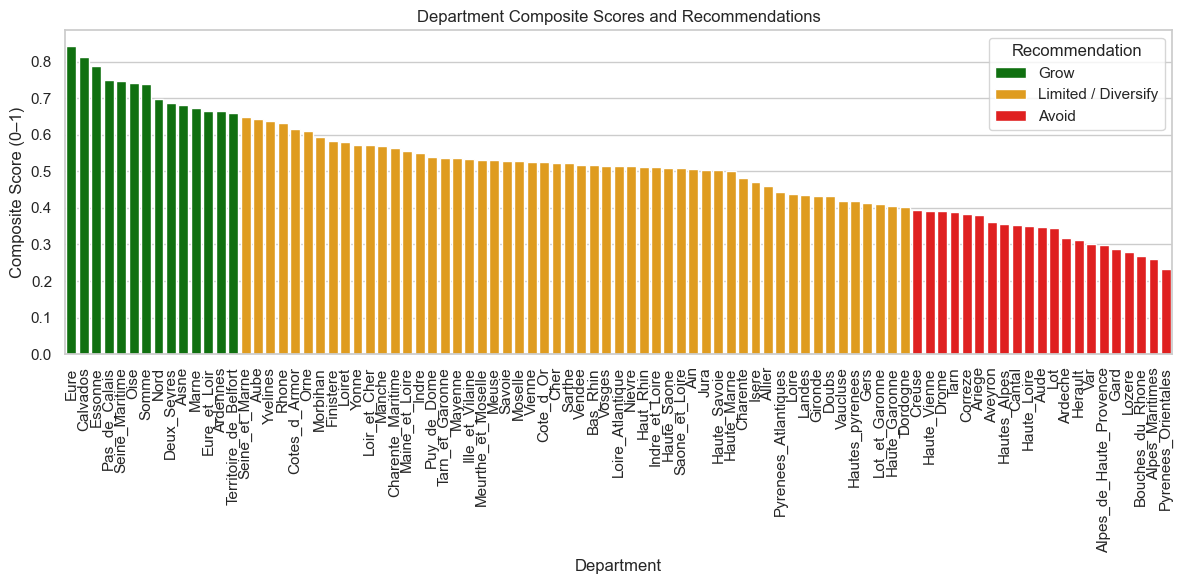

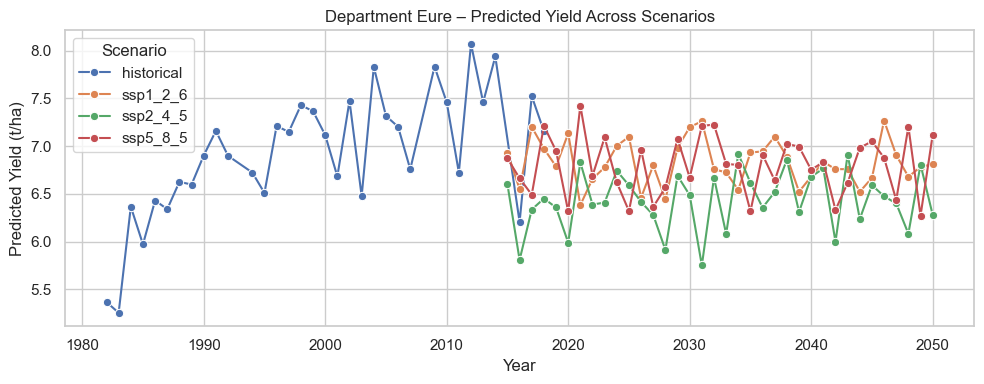

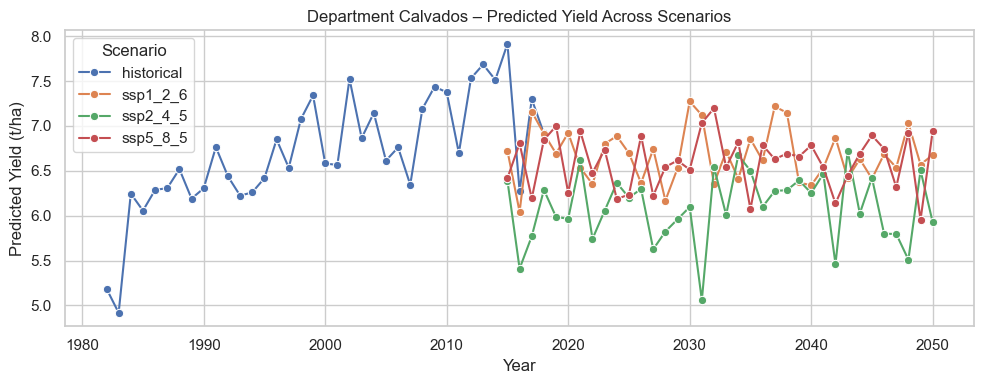

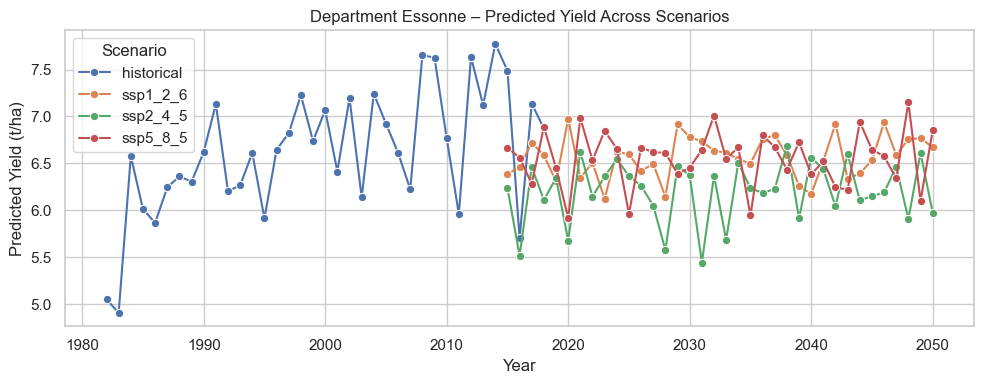

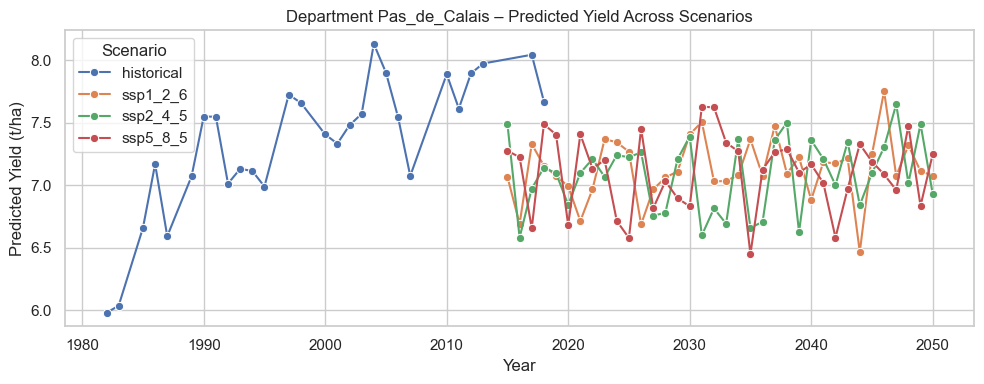

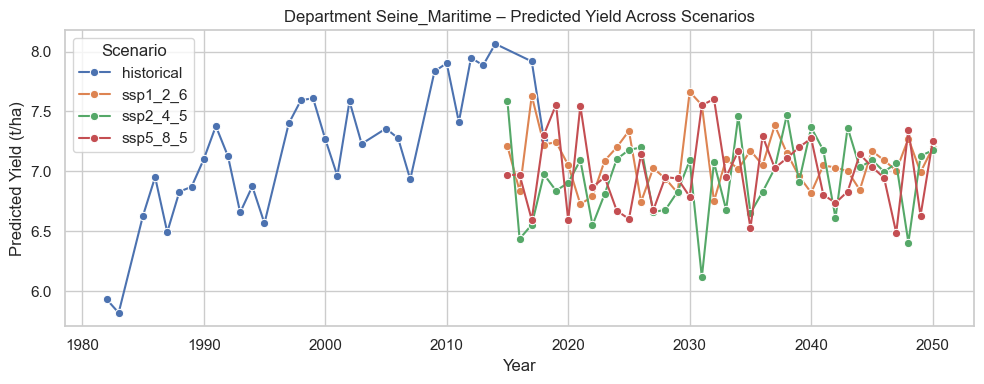

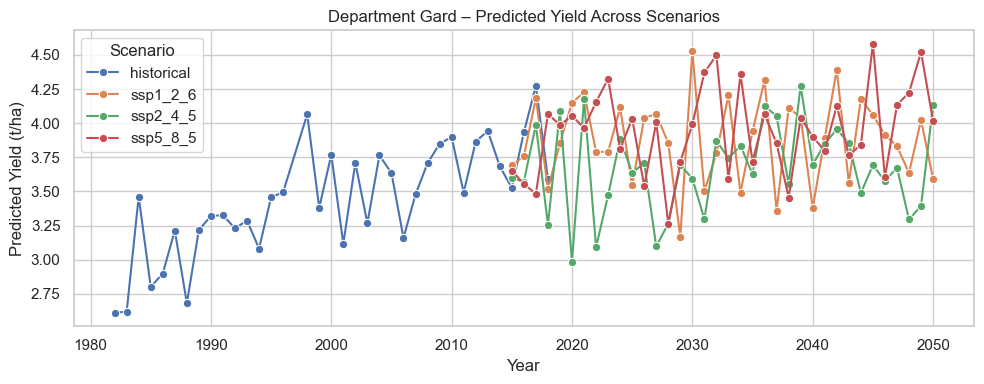

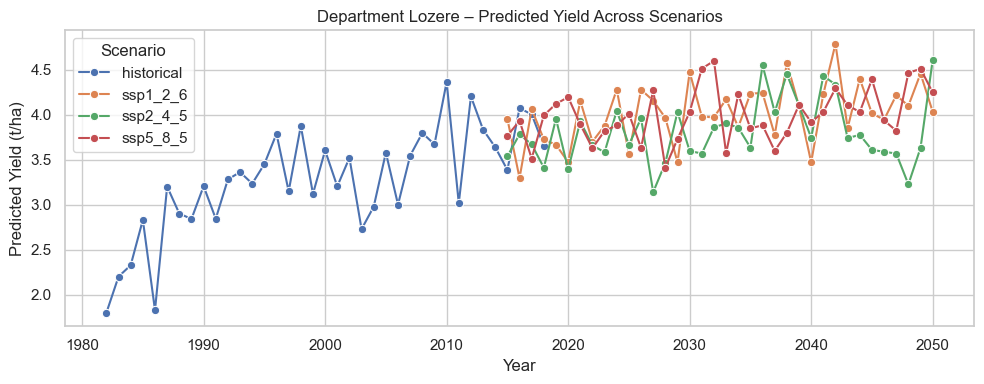

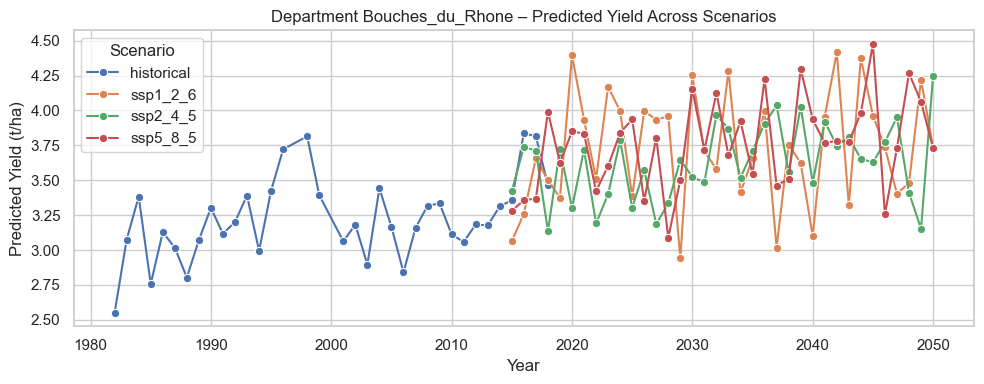

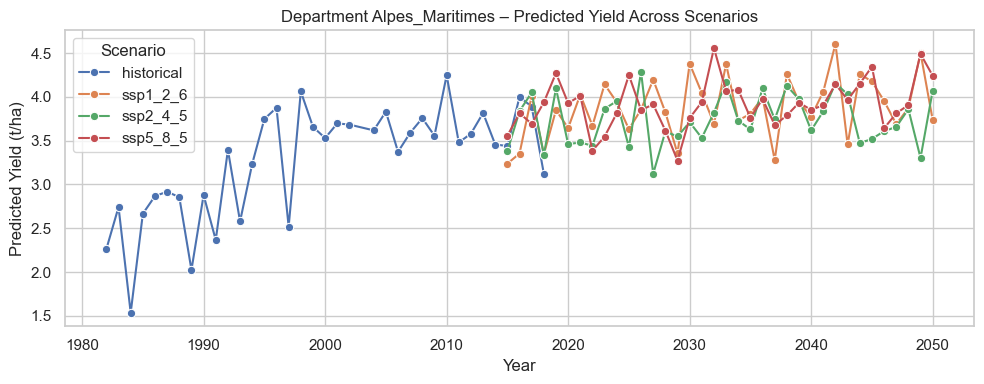

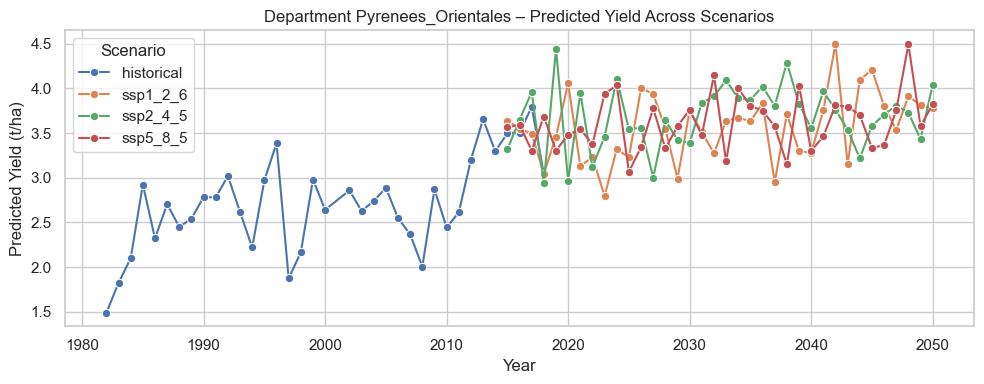

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# ------------------------------
# 1️⃣ Bar Chart of Composite Scores
# ------------------------------
plt.figure(figsize=(12,6))
palette = {'Grow':'green','Limited / Diversify':'orange','Avoid':'red'}

sns.barplot(
    data=decision_matrix.sort_values('composite_score', ascending=False),
    x='department',
    y='composite_score',
    hue='recommendation',
    dodge=False,
    palette=palette
)
plt.xticks(rotation=90)
plt.title("Department Composite Scores and Recommendations")
plt.ylabel("Composite Score (0–1)")
plt.xlabel("Department")
plt.legend(title='Recommendation')
plt.tight_layout()
plt.show()

# ------------------------------
# 2️⃣ Line Plot of Predicted Yields Across Scenarios
# ------------------------------
# Select top 5 and bottom 5 departments for clarity
top_bottom_depts = list(decision_matrix.head(5)['department']) + list(decision_matrix.tail(5)['department'])

for dept in top_bottom_depts:
    dept_data = all_preds[all_preds['department']==dept]
    plt.figure(figsize=(10,4))
    sns.lineplot(data=dept_data, x='year', y='yield_pred', hue='scenario', marker='o')
    plt.title(f"Department {dept} – Predicted Yield Across Scenarios")
    plt.ylabel("Predicted Yield (t/ha)")
    plt.xlabel("Year")
    plt.legend(title='Scenario')
    plt.tight_layout()
    plt.show()
